In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# https://towardsdatascience.com/making-your-own-discover-weekly-f1ac7546fedb
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
from config import client_id, client_secret, redirect_uri, username, good_playlist_id, bad_playlist_id
import numpy as np
import pandas as pd

#client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [3]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [4]:
good_tracks = get_playlist_tracks(username, good_playlist_id)

data_good = []

for i in range(len(good_tracks)):
    row = [good_tracks[i]['track']['id'],
          good_tracks[i]['track']['name'],
          good_tracks[i]['track']['popularity']]
    data_good.append(row)

df_good = pd.DataFrame(data=data_good,columns=['id','name','popularity'])
df_good.tail()

,id,name,popularity
259,70nr0Rr3BFoxZo8ZOAgHdE,Thinkin Bout U - VIP Mix,37
260,1f4p1hDsYdSrgmNeIlwpad,Bad Timing (with loren north),41
261,7kGIyYQc44EQcJR3HH314y,Better Not (feat. Wafia) - Shaun Frank Remix,44
262,19Y4vTCoDl0Nu4fnO6jMZE,Dirty Mind - Disco Fries Remix (feat. Ty Dolla...,33
263,6D5pfooPP6hi99RaXjkDsP,Summertime Sadness [Lana Del Rey vs. Cedric Ge...,13


In [5]:
df_good.to_csv('good_songs.csv', index=False)

In [6]:
bad_tracks = get_playlist_tracks(username, bad_playlist_id)

data_bad = []

for i in range(len(bad_tracks)):
    row = [bad_tracks[i]['track']['id'],
          bad_tracks[i]['track']['name'],
          bad_tracks[i]['track']['popularity']]
    data_bad.append(row)

df_bad = pd.DataFrame(data=data_bad,columns=['id','name','popularity'])
df_bad.tail()

,id,name,popularity
236,1mKXFLRA179hdOWQBwUk9e,Just Give Me a Reason (feat. Nate Ruess),76
237,2ZQ4Q9xL7W8FEgO1d4o7YH,Don't Let Me Get Me - Radio Edit,10
238,5rgy6ghBq1eRApCkeUdJXf,We Are Young (feat. Janelle Monáe),70
239,67WTwafOMgegV6ABnBQxcE,Some Nights,67
240,53Y0kdCa1CZ9gRqEuknfwy,Bang My Head (feat. Sia & Fetty Wap),62


In [7]:
df_bad.to_csv('bad_songs.csv', index=False)

In [8]:
good_ids=df_good['id'].tolist()
bad_ids=df_bad['id'].tolist()

# Create a function called "chunks" with two arguments, l and n:
def chunks(l, n):
    # For item i in a range that is a length of l,
    for i in range(0, len(l), n):
        # Create an index range for l of n items:
        yield l[i:i+n]

In [9]:
good_features = []

# Create a list that from the results of the function chunks:
for i in range(0, len(list(chunks(good_ids, 50)))):
    good_batch = list(chunks(good_ids, 50))[i]
    good_features_temp = sp.audio_features(tracks=good_batch)
    good_features.append(good_features_temp)

columns = list(good_features[0][0].keys())
columns.sort()

# audio features - GOOD
df_features_good = pd.DataFrame(columns = columns)

for i in range(0, len(good_features)):
    df_temp = pd.DataFrame(good_features[i], columns = columns)
    df_features_good = df_features_good.append(df_temp, ignore_index=True)
    
df_features_good.tail()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
259,0.0172,https://api.spotify.com/v1/audio-analysis/70nr...,0.755,255476,0.745,70nr0Rr3BFoxZo8ZOAgHdE,0.559000,9,0.1510,-4.761,1,0.0313,126.025,4,https://api.spotify.com/v1/tracks/70nr0Rr3BFox...,audio_features,spotify:track:70nr0Rr3BFoxZo8ZOAgHdE,0.427
260,0.5890,https://api.spotify.com/v1/audio-analysis/1f4p...,0.676,224434,0.644,1f4p1hDsYdSrgmNeIlwpad,0.000001,10,0.0995,-6.647,0,0.1120,106.073,4,https://api.spotify.com/v1/tracks/1f4p1hDsYdSr...,audio_features,spotify:track:1f4p1hDsYdSrgmNeIlwpad,0.459
261,0.0429,https://api.spotify.com/v1/audio-analysis/7kGI...,0.730,209244,0.877,7kGIyYQc44EQcJR3HH314y,0.000694,6,0.2860,-4.350,0,0.0845,119.024,4,https://api.spotify.com/v1/tracks/7kGIyYQc44EQ...,audio_features,spotify:track:7kGIyYQc44EQcJR3HH314y,0.708
262,0.1100,https://api.spotify.com/v1/audio-analysis/19Y4...,0.808,169253,0.821,19Y4vTCoDl0Nu4fnO6jMZE,0.011400,2,0.1130,-3.712,0,0.0548,120.008,4,https://api.spotify.com/v1/tracks/19Y4vTCoDl0N...,audio_features,spotify:track:19Y4vTCoDl0Nu4fnO6jMZE,0.403
263,0.0138,https://api.spotify.com/v1/audio-analysis/6D5p...,0.567,214912,0.813,6D5pfooPP6hi99RaXjkDsP,0.000009,1,0.1250,-5.744,0,0.0581,126.044,4,https://api.spotify.com/v1/tracks/6D5pfooPP6hi...,audio_features,spotify:track:6D5pfooPP6hi99RaXjkDsP,0.114


In [10]:
df_features_good.to_csv('good_features.csv', index=False)

In [11]:
bad_features = []

# Create a list that from the results of the function chunks:
for i in range(0, len(list(chunks(bad_ids, 50)))):
    bad_batch = list(chunks(bad_ids, 50))[i]
    bad_features_temp = sp.audio_features(tracks=bad_batch)
    bad_features.append(bad_features_temp)

columns = list(bad_features[0][0].keys())
columns.sort()

# audio features - GOOD
df_features_bad = pd.DataFrame(columns = columns)

for i in range(0, len(bad_features)):
    df_temp = pd.DataFrame(bad_features[i], columns = columns)
    df_features_bad = df_features_bad.append(df_temp, ignore_index=True)
    
df_features_bad.tail()

,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
236,0.34600,https://api.spotify.com/v1/audio-analysis/1mKX...,0.778,242733,0.547,1mKXFLRA179hdOWQBwUk9e,0.000302,2,0.1320,-7.273,1,0.0489,95.002,4,https://api.spotify.com/v1/tracks/1mKXFLRA179h...,audio_features,spotify:track:1mKXFLRA179hdOWQBwUk9e,0.441
237,0.00264,https://api.spotify.com/v1/audio-analysis/2ZQ4...,0.544,210627,0.849,2ZQ4Q9xL7W8FEgO1d4o7YH,0.000000,0,0.0371,-4.778,0,0.0940,98.376,4,https://api.spotify.com/v1/tracks/2ZQ4Q9xL7W8F...,audio_features,spotify:track:2ZQ4Q9xL7W8FEgO1d4o7YH,0.589
238,0.02000,https://api.spotify.com/v1/audio-analysis/5rgy...,0.378,250627,0.638,5rgy6ghBq1eRApCkeUdJXf,0.000077,10,0.0849,-5.576,1,0.0750,184.086,4,https://api.spotify.com/v1/tracks/5rgy6ghBq1eR...,audio_features,spotify:track:5rgy6ghBq1eRApCkeUdJXf,0.735
239,0.01780,https://api.spotify.com/v1/audio-analysis/67WT...,0.672,277040,0.738,67WTwafOMgegV6ABnBQxcE,0.000068,0,0.0927,-7.045,1,0.0506,107.938,4,https://api.spotify.com/v1/tracks/67WTwafOMgeg...,audio_features,spotify:track:67WTwafOMgegV6ABnBQxcE,0.392
240,0.05250,https://api.spotify.com/v1/audio-analysis/53Y0...,0.599,193333,0.869,53Y0kdCa1CZ9gRqEuknfwy,0.007190,0,0.1030,-3.697,1,0.0789,108.061,4,https://api.spotify.com/v1/tracks/53Y0kdCa1CZ9...,audio_features,spotify:track:53Y0kdCa1CZ9gRqEuknfwy,0.593


In [12]:
df_features_bad.to_csv('bad_features.csv', index=False)

In [13]:
# features documentation https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [14]:
mylist = [1,2,3,4,5]
mylist[1]

# weird thing about lists indexing https://stackoverflow.com/questions/3451157/python-list-sublist-selection-1-weirdness

2

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

In [16]:
# basic plots of features - distribution

#plt.bar(df_features_good.index, df_features_good['danceability']);
# plt.hist(df_features_good['danceability'], density=True);

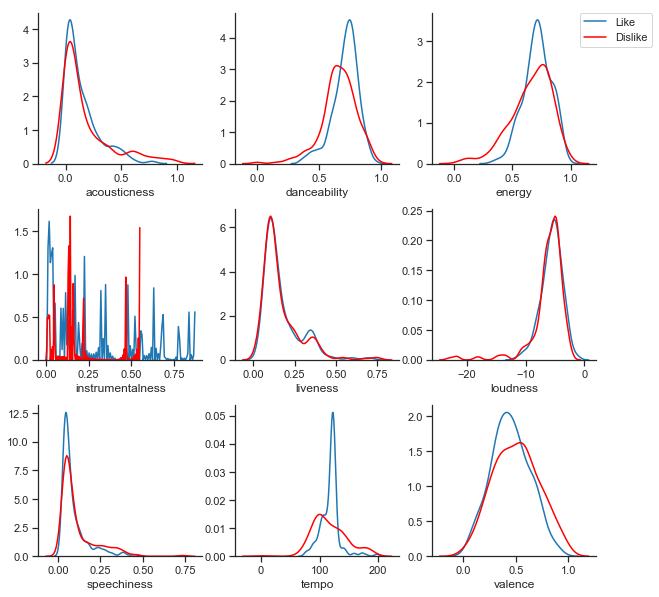

In [17]:
import warnings
warnings.filterwarnings('ignore')

sns.set_palette("tab10")
sns.set_style("ticks")

f, axes = plt.subplots(3, 3, figsize=(10,10))

sns.despine(fig=f, ax=axes)

sns.distplot(df_features_good['acousticness'], hist=False, ax=axes[0,0]);
sns.distplot(df_features_bad['acousticness'], hist=False, ax=axes[0,0], color='red');
sns.distplot(df_features_good['danceability'], hist=False, ax=axes[0,1]);
sns.distplot(df_features_bad['danceability'], hist=False, ax=axes[0,1], color='red');
sns.distplot(df_features_good['energy'], hist=False, ax=axes[0,2], label='Like');
sns.distplot(df_features_bad['energy'], hist=False, ax=axes[0,2], color='red', label='Dislike');

sns.distplot(df_features_good['instrumentalness'], hist=False, ax=axes[1,0]);
sns.distplot(df_features_bad['instrumentalness'], hist=False, ax=axes[1,0], color='red');
sns.distplot(df_features_good['liveness'], hist=False, ax=axes[1,1]);
sns.distplot(df_features_bad['liveness'], hist=False, ax=axes[1,1], color='red');
sns.distplot(df_features_good['loudness'], hist=False, ax=axes[1,2]);
sns.distplot(df_features_bad['loudness'], hist=False, ax=axes[1,2], color='red');

sns.distplot(df_features_good['speechiness'], hist=False, ax=axes[2,0]);
sns.distplot(df_features_bad['speechiness'], hist=False, ax=axes[2,0], color='red');
sns.distplot(df_features_good['tempo'], hist=False, ax=axes[2,1]);
sns.distplot(df_features_bad['tempo'], hist=False, ax=axes[2,1], color='red');
sns.distplot(df_features_good['valence'], hist=False, ax=axes[2,2]);
sns.distplot(df_features_bad['valence'], hist=False, ax=axes[2,2], color='red');

plt.subplots_adjust(hspace = 0.3)

# put legend on one subplot
axes[0,2].legend(['Like', 'Dislike'], bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)

#%config InlineBackend.figure_format = 'svg'

In [18]:
#sns.distplot(df_features_good['danceability']);

In [19]:
# how to loop through subplots
# https://towardsdatascience.com/a-step-by-step-guide-for-creating-advanced-python-data-visualizations-with-seaborn-matplotlib-1579d6a1a7d0